In [1]:
import cv2
import pandas as pd
import numpy as np
from PIL import Image

In [2]:
df = pd.read_csv('data/labels/labels.csv', header=None)

In [3]:
df.head()

0
0   1478019952686311006.jpg 950 574 1004 620 0 "car"
1  1478019952686311006.jpg 1748 482 1818 744 0 "p...
2    1478019953180167674.jpg 872 586 926 632 0 "car"
3  1478019953689774621.jpg 686 566 728 618 1 "truck"
4    1478019953689774621.jpg 716 578 764 622 0 "car"

In [4]:
df = pd.DataFrame(df[0].str.split(' ').tolist(),
                                   columns = ['filename','xmin', 'ymin', 'xmax', 'ymax', 'occluded', 'class', 'attributes'])

In [5]:
del df['occluded']

In [6]:
del df['attributes']

In [7]:
df['class'] = df['class'].str.strip('"')

In [8]:
df.head()

filename  xmin ymin  xmax ymax       class
0  1478019952686311006.jpg   950  574  1004  620         car
1  1478019952686311006.jpg  1748  482  1818  744  pedestrian
2  1478019953180167674.jpg   872  586   926  632         car
3  1478019953689774621.jpg   686  566   728  618       truck
4  1478019953689774621.jpg   716  578   764  622         car

In [9]:
df.dtypes

filename    object
xmin        object
ymin        object
xmax        object
ymax        object
class       object
dtype: object

In [10]:
df[['xmin','ymin', 'xmax', 'ymax']] = df[['xmin','ymin', 'xmax', 'ymax']].apply(pd.to_numeric)

In [11]:
df.dtypes

filename    object
xmin         int64
ymin         int64
xmax         int64
ymax         int64
class       object
dtype: object

In [12]:
df.to_csv('data/labels/labels.csv', index=False)

In [14]:
def draw_boxes(image_name):
    selected_value = df[df.filename == image_name]
    img = cv2.imread('data/images/{}'.format(image_name))
    for index, row in selected_value.iterrows():
        img = cv2.rectangle(img, (row['xmin'], row['ymin']), (row['xmax'], row['ymax']), (0, 255, 0), 3)
    return img

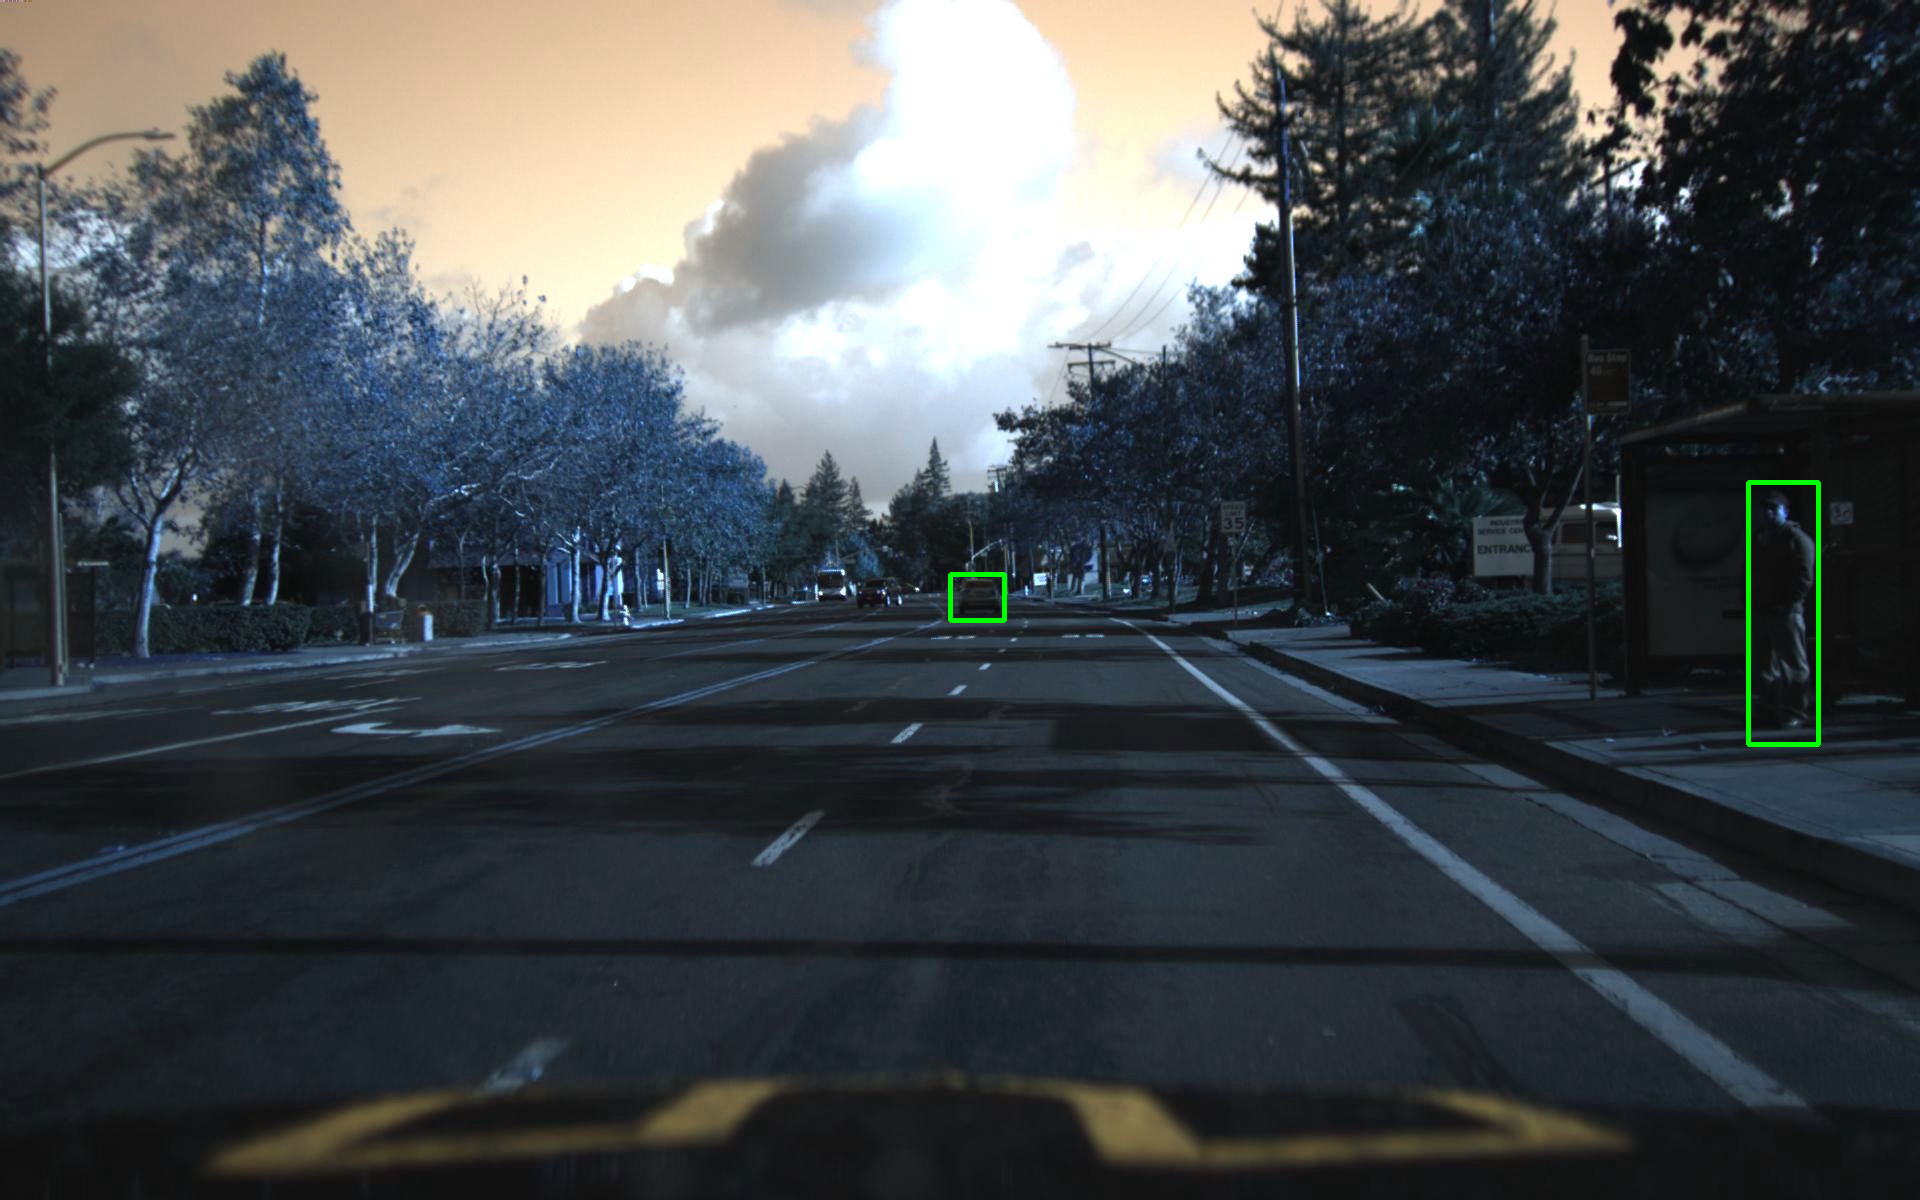

In [15]:
Image.fromarray(draw_boxes('1478019952686311006.jpg'))

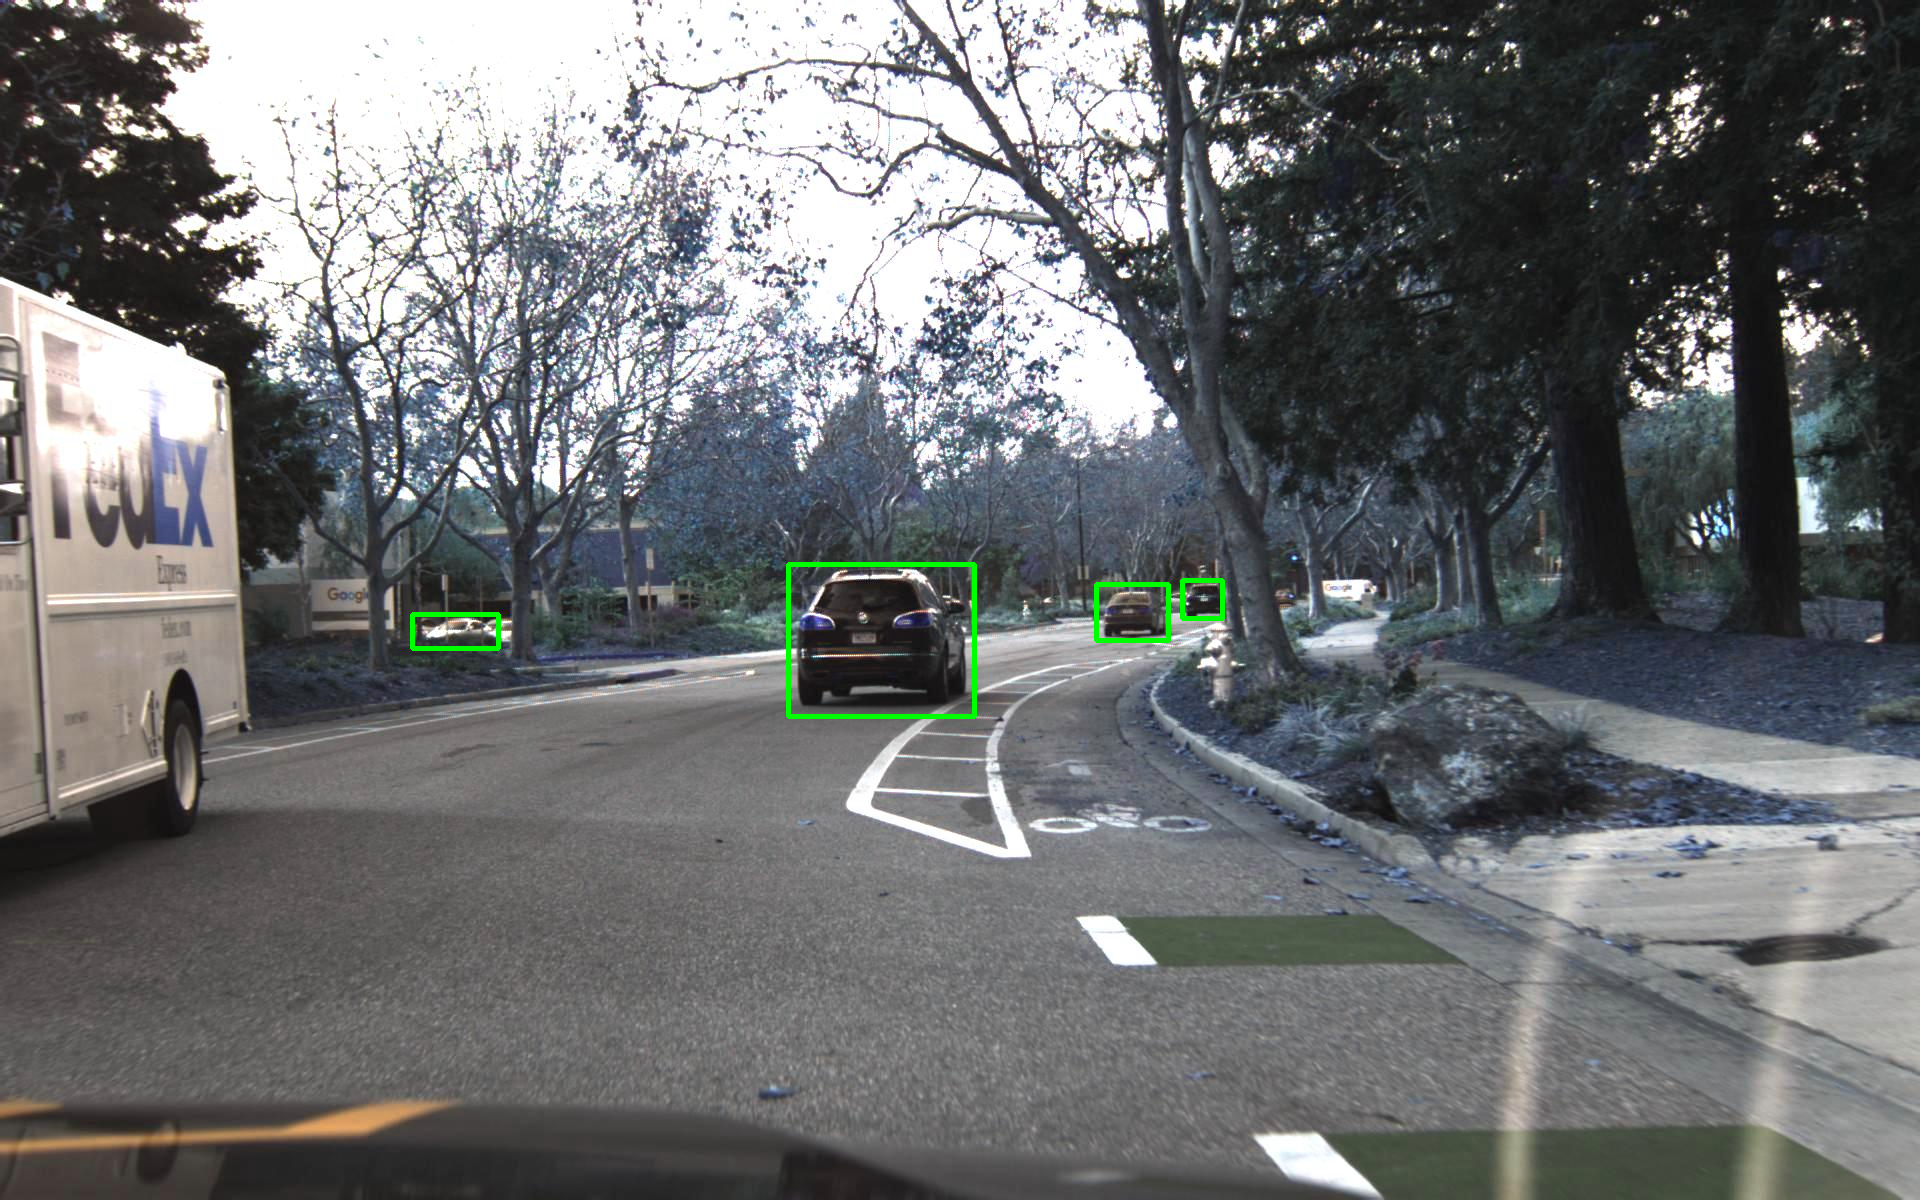

In [16]:
Image.fromarray(draw_boxes('1478898242903352265.jpg'))

In [13]:
filename_grouped = df.groupby('filename')

In [14]:
len(filename_grouped)

13063

In [15]:
grouped_list = [filename_grouped.get_group(x) for x in filename_grouped.groups]

In [16]:
train_index = np.random.choice(len(filename_grouped), size=10454, replace=False)
test_index = np.setdiff1d(list(range(13063)), train_index)

In [17]:
len(train_index), len(test_index)

(10454, 2609)

In [18]:
train = pd.concat([grouped_list[i] for i in train_index])
test = pd.concat([grouped_list[i] for i in test_index])

In [19]:
len(train), len(test)

(74288, 18798)

In [20]:
len(df)

93086

In [21]:
74567 + 18519

93086

In [22]:
train.to_csv('data/labels/train_labels.csv', index=None)
test.to_csv('data/labels/test_labels.csv', index=None)